In [1]:
# pip install scib-metrics

In [2]:
import scanpy as sc
import numpy as np

from scib_metrics.benchmark import Benchmarker

%matplotlib inline

In [3]:
adata = sc.read(
    "/home/lucamannino/R_Projects/scAtlas/Integration/All_Integrations.h5ad")
adata

AnnData object with n_obs × n_vars = 329774 × 47372
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Mt', 'Rb', 'Mt_Rb', 'Condition', 'gender', 'Chemistry', 'technology', 'Study', 'BMI', 'Age', 'Emont_Annotation', 'BMI.1', 'Study_chemistry', 'S.Score', 'G2M.Score', 'Phase', 'samples', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'RNA_snn_res.1', 'seurat_clusters', 'annotation_heatmap', 'RNA_snn_res.1.1', 'RNA_snn_res.1.2', 'RNA_snn_res.1.3', 'RNA_snn_res.1.4', 'RNA_snn_res.1.5', 'RNA_snn_res.1.6', 'RNA_snn_res.1.7', 'RNA_snn_res.1.8', 'RNA_snn_res.1.9', 'RNA_snn_res.2', 'RNA_snn_res.2.1', 'RNA_snn_res.2.2', 'RNA_snn_res.2.3', 'RNA_snn_res.2.4', 'RNA_snn_res.2.5', 'RNA_snn_res.2.6', 'RNA_snn_res.2.7', 'RNA_snn_res.2.8', 'RNA_snn_res.2.9', 'RNA_snn_res.3', 'Subcluster5', 'final_annotation', 'all_labels', 'samples_study_chem'
    var: 'vst.mean', 'vst.variance

In [4]:
bm = Benchmarker(
    adata,
    batch_key= "samples_study_chem",
    label_key= "final_annotation",
    embedding_obsm_keys=["X_raw_pca", "X_harmony", "X_scvi_emb", "X_bbknn_pca"],
    n_jobs=6)

bm.benchmark()

/home/lucamannino/miniconda3/envs/scIB/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:385: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)
Metrics:   0%|        | 0/10 [00:00<?, ?it/s, Bio conservation: isolated_labels]
Metrics:  10%| | 1/10 [1:13:05<10:57:51, 4385.67s/it, Bio conservation: isolated
Metrics:  10%| | 1/10 [1:13:05<10:57:51, 4385.67s/it, Bio conservation: nmi_ari_
Metrics:  20%|▏| 2/10 [1:13:37<4:03:16, 1824.58s/it, Bio conservation: nmi_ari_c
Metrics:  20%|▏| 2/10 [1:13:37<4:03:16, 1824.58s/it, Bio conservation: silhouett
Metrics:  30%|▎| 3/10 [2:25:40<5:45:57, 2965.39s/it, Bio conservation: silhouett
Metrics:  30%|▎| 3/10 [2:25:40<5:45:57, 2965.39s/it, Bio conservation: clisi_knn
Metrics:  40%|▍| 4/10 [2:25:43<2:59:34, 1795.82s/it, Bio conservation: c

/home/lucamannino/miniconda3/envs/scIB/lib/python3.12/site-packages/scib_metrics/benchmark/_core.py:268: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Aggregate score' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[_METRIC_TYPE, per_class_score.columns] = _AGGREGATE_SCORE
/home/lucamannino/miniconda3/envs/scIB/lib/python3.12/site-packages/scib_metrics/benchmark/_core.py:268: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Aggregate score' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[_METRIC_TYPE, per_class_score.columns] = _AGGREGATE_SCORE
/home/lucamannino/miniconda3/envs/scIB/lib/python3.12/site-packages/scib_metrics/benchmark/_core.py:268: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise

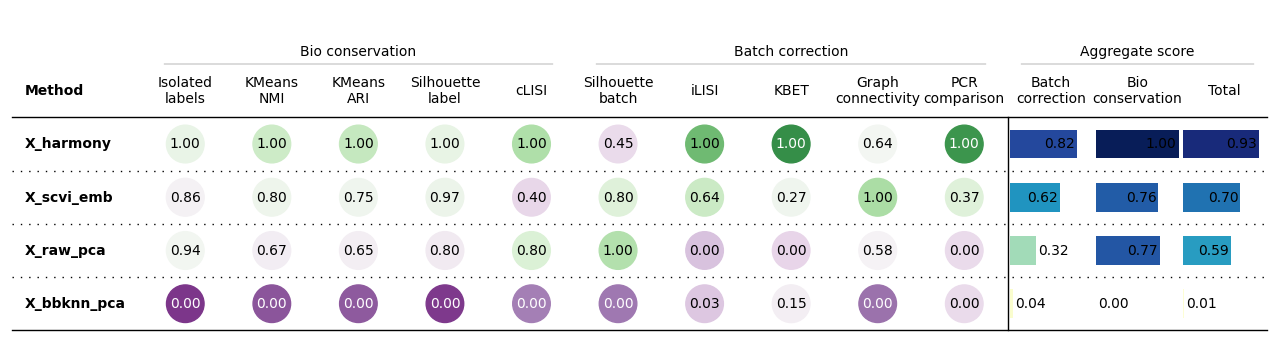

In [5]:
bm.plot_results_table()

In [6]:
bm

In [12]:
from rich import print

df = bm.get_results()

print(df)
df.transpose()

/home/lucamannino/miniconda3/envs/scIB/lib/python3.12/site-packages/scib_metrics/benchmark/_core.py:268: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Aggregate score' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[_METRIC_TYPE, per_class_score.columns] = _AGGREGATE_SCORE
/home/lucamannino/miniconda3/envs/scIB/lib/python3.12/site-packages/scib_metrics/benchmark/_core.py:268: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Aggregate score' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[_METRIC_TYPE, per_class_score.columns] = _AGGREGATE_SCORE
/home/lucamannino/miniconda3/envs/scIB/lib/python3.12/site-packages/scib_metrics/benchmark/_core.py:268: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise

Isolated labels        KMeans NMI        KMeans ARI  \
Embedding                                                           
X_raw_pca            0.941364          0.670973          0.650749   
X_harmony                 1.0               1.0               1.0   
X_scvi_emb           0.856075           0.79926           0.75374   
X_bbknn_pca               0.0               0.0               0.0   
Metric Type  Bio conservation  Bio conservation  Bio conservation   

             Silhouette label             cLISI  Silhouette batch  \
Embedding                                                           
X_raw_pca            0.797903               0.8               1.0   
X_harmony                 1.0               1.0          0.445283   
X_scvi_emb           0.970682               0.4           0.79951   
X_bbknn_pca               0.0               0.0               0.0   
Metric Type  Bio conservation  Bio conservation  Batch correction   

                        iLISI              KBET Graph connectivity  \
Embedding                                                            
X_raw_pca                 0.0               0.0           0.579973   
X_harmony                 1.0               1.0           0.635588   
X_scvi_emb           0.641754          0.270785                1.0   
X_bbknn_pca          0.028996          0.152535                0.0   
Metric Type  Batch correction  Batch correction   Batch correction   

               PCR comparison Batch correction Bio conservation  \
Embedding                                                         
X_raw_pca                 0.0         0.315995         0.772198   
X_harmony                 1.0         0.816174              1.0   
X_scvi_emb           0.369192         0.616248         0.755951   
X_bbknn_pca          0.000001         0.036306              0.0   
Metric Type  Batch correction  Aggregate score  Aggregate score   

                       Total  
Embedding                     
X_raw_pca           0.589716  
X_harmony            0.92647  
X_scvi_emb           0.70007  
X_bbknn_pca         0.014523  
Metric Type  Aggregate score

Embedding,X_raw_pca,X_harmony,X_scvi_emb,X_bbknn_pca,Metric Type
Isolated labels,0.941364,1.0,0.856075,0.0,Bio conservation
KMeans NMI,0.670973,1.0,0.79926,0.0,Bio conservation
KMeans ARI,0.650749,1.0,0.75374,0.0,Bio conservation
Silhouette label,0.797903,1.0,0.970682,0.0,Bio conservation
cLISI,0.8,1.0,0.4,0.0,Bio conservation
Silhouette batch,1.0,0.445283,0.79951,0.0,Batch correction
iLISI,0.0,1.0,0.641754,0.028996,Batch correction
KBET,0.0,1.0,0.270785,0.152535,Batch correction
Graph connectivity,0.579973,0.635588,1.0,0.0,Batch correction
PCR comparison,0.0,1.0,0.369192,0.000001,Batch correction


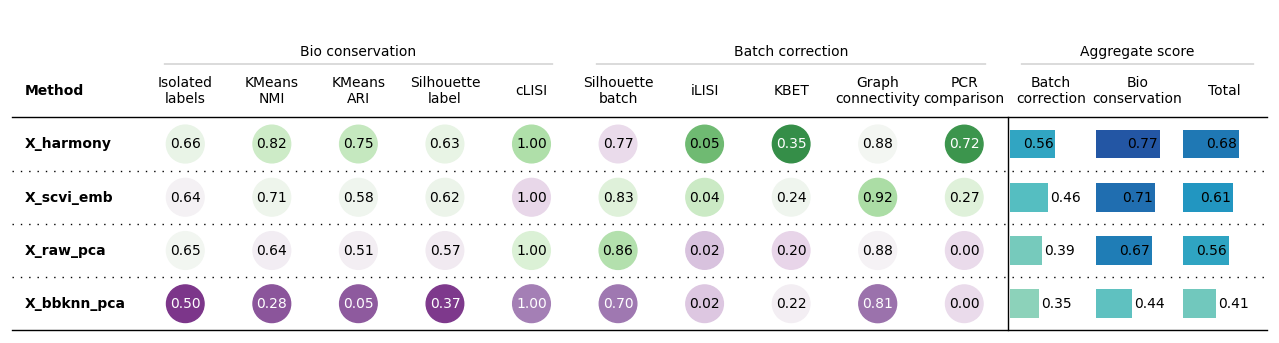

In [10]:
bm.plot_results_table(min_max_scale=False)

In [ ]:
bm.plot_results_table()

In [8]:
from rich import print

df = bm.get_results(min_max_scale=False)
print(df)

Isolated labels        KMeans NMI        KMeans ARI  \
Embedding                                                           
X_raw_pca            0.649568          0.637867           0.50758   
X_harmony            0.658608          0.815354          0.750766   
X_scvi_emb           0.636419          0.707069          0.579293   
X_bbknn_pca          0.504433          0.275925          0.054459   
Metric Type  Bio conservation  Bio conservation  Bio conservation   

             Silhouette label             cLISI  Silhouette batch  \
Embedding                                                           
X_raw_pca            0.572952               1.0          0.863509   
X_harmony            0.625017               1.0           0.77454   
X_scvi_emb           0.617464               1.0          0.831353   
X_bbknn_pca          0.367395               1.0          0.703123   
Metric Type  Bio conservation  Bio conservation  Batch correction   

                        iLISI              KBET Graph connectivity  \
Embedding                                                            
X_raw_pca            0.023142          0.199397           0.876833   
X_harmony            0.051147          0.349502           0.883101   
X_scvi_emb           0.041114          0.240043           0.924172   
X_bbknn_pca          0.023954          0.222293           0.811467   
Metric Type  Batch correction  Batch correction   Batch correction   

               PCR comparison Batch correction Bio conservation  \
Embedding                                                         
X_raw_pca                   0         0.392576         0.673594   
X_harmony            0.723775         0.556413         0.769949   
X_scvi_emb           0.267212         0.460779         0.708049   
X_bbknn_pca          0.000001         0.352168         0.440443   
Metric Type  Batch correction  Aggregate score  Aggregate score   

                       Total  
Embedding                     
X_raw_pca           0.561186  
X_harmony           0.684535  
X_scvi_emb          0.609141  
X_bbknn_pca         0.405133  
Metric Type  Aggregate score

In [9]:
df.transpose()

Embedding,X_raw_pca,X_harmony,X_scvi_emb,X_bbknn_pca,Metric Type
Isolated labels,0.649568,0.658608,0.636419,0.504433,Bio conservation
KMeans NMI,0.637867,0.815354,0.707069,0.275925,Bio conservation
KMeans ARI,0.50758,0.750766,0.579293,0.054459,Bio conservation
Silhouette label,0.572952,0.625017,0.617464,0.367395,Bio conservation
cLISI,1.0,1.0,1.0,1.0,Bio conservation
Silhouette batch,0.863509,0.77454,0.831353,0.703123,Batch correction
iLISI,0.023142,0.051147,0.041114,0.023954,Batch correction
KBET,0.199397,0.349502,0.240043,0.222293,Batch correction
Graph connectivity,0.876833,0.883101,0.924172,0.811467,Batch correction
PCR comparison,0,0.723775,0.267212,0.000001,Batch correction
